In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('../Data/raw/Fraud_Data(2).csv')
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [3]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [4]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [5]:
df_duplicate=df.drop_duplicates()

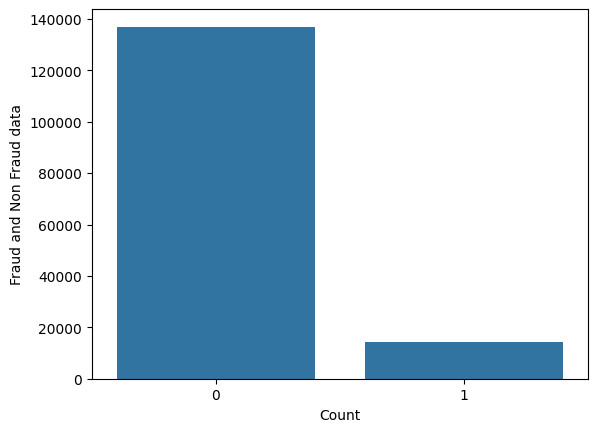

In [6]:
data=df_duplicate['class'].value_counts().reset_index()
plt.Figure(figsize=(10,8))
sns.barplot(data=data,x='class',y='count' )
plt.xlabel('Count')
plt.ylabel('Fraud and Non Fraud data')
plt.show()

In [7]:
df_duplicate['signup_time']=pd.to_datetime(df_duplicate['signup_time'])
df_duplicate['purchase_time']=pd.to_datetime(df_duplicate['purchase_time'])
df_duplicate['dates']=df_duplicate['purchase_time'].dt.date
df_duplicate['hour']=df_duplicate['purchase_time'].dt.hour


df_duplicate['time_since_signup'] = (df_duplicate['purchase_time'] - df_duplicate['signup_time']).dt.total_seconds() / 60  # in hours

df_duplicate['day_of_the_week']=df_duplicate['purchase_time'].dt.day_name()
df_hourly=df_duplicate.groupby(['hour','class']).size().reset_index(name='Transaction_count')
df_daily=df_duplicate.groupby(['day_of_the_week','class']).size().reset_index(name='Transaction_count')

Time Based Variables

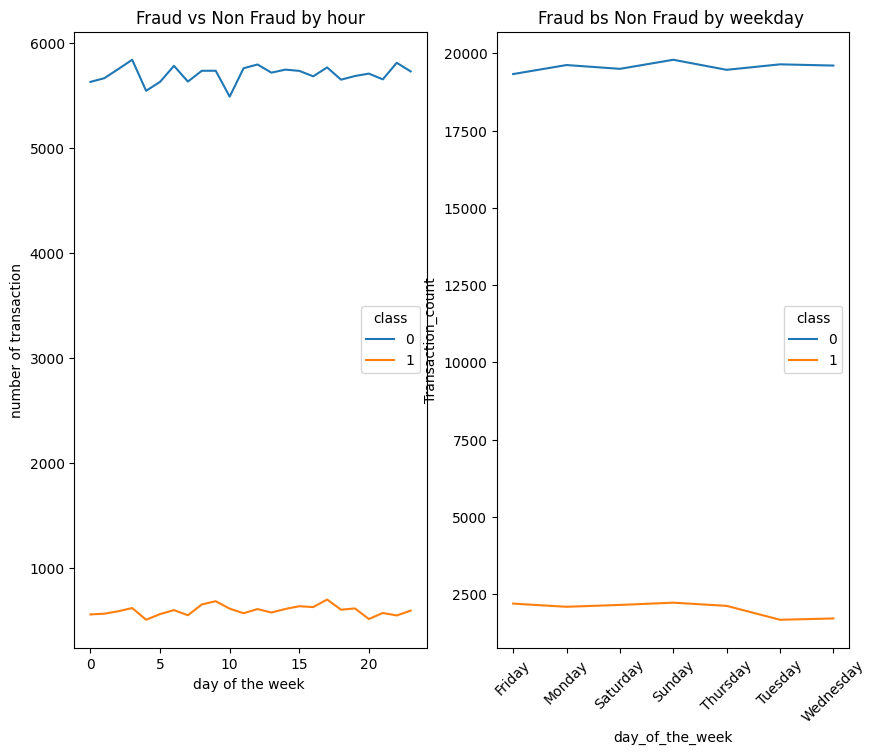

In [8]:

fig,(axis1,axis2)=plt.subplots(ncols=2,figsize=(10,8))
sns.lineplot(ax=axis1,data=df_hourly,x='hour',y='Transaction_count',hue='class')
sns.lineplot(ax=axis2,data=df_daily,x='day_of_the_week',y='Transaction_count',hue='class')
axis1.set_title("Fraud vs Non Fraud by hour")
axis1.set_xlabel('hour')
axis1.set_ylabel('number of transaction')
axis2.set_title("Fraud bs Non Fraud by weekday ")
axis1.set_xlabel('day of the week ')
axis1.set_ylabel('number of transaction')
plt.xticks(rotation=45)
plt.show()

# how Purchase value and Age, is realted to fraud is there correlation 
# do fraudelent transaction has higher average amounts?

C:\Users\Hp\AppData\Local\Temp\ipykernel_17664\1720610830.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_purchase_fraud=df_fraud.groupby('purchase_bin').size().reset_index(name='purchase_fraud')


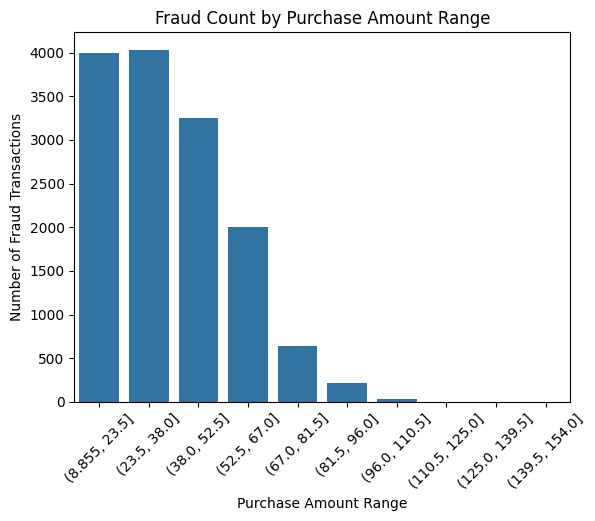

In [9]:
df_duplicate['purchase_bin']=pd.cut(df_duplicate['purchase_value'],bins=10)

df_fraud=df_duplicate[df_duplicate['class']==1]
df_purchase_fraud=df_fraud.groupby('purchase_bin').size().reset_index(name='purchase_fraud')
plt.Figure(figsize=(15,12))
sns.barplot(data=df_purchase_fraud,x='purchase_bin',y='purchase_fraud')
plt.title('Fraud Count by Purchase Amount Range')
plt.xlabel('Purchase Amount Range')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_17664\3643604243.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_timesince_signup_fraud=df_fraud.groupby('time_since_signup_bin').size().reset_index(name='time_since')


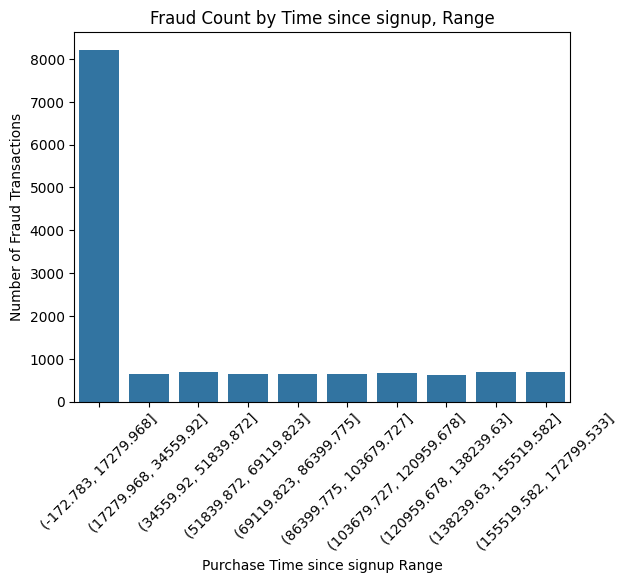

In [10]:
df_duplicate['time_since_signup_bin']=pd.cut(df_duplicate['time_since_signup'],bins=10)

df_fraud=df_duplicate[df_duplicate['class']==1]
df_timesince_signup_fraud=df_fraud.groupby('time_since_signup_bin').size().reset_index(name='time_since')
plt.Figure(figsize=(15,12))
sns.barplot(data=df_timesince_signup_fraud,x='time_since_signup_bin',y='time_since')
plt.title('Fraud Count by Time since signup, Range')
plt.xlabel('Purchase Time since signup Range')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()

In [11]:
df_duplicate['ip_address']=df_duplicate['ip_address'].astype(int)
fraud_data=df_duplicate.copy()
country_data=pd.read_csv('../Data/raw/IpAddress_to_Country.csv')



In [12]:
#!pip install IntervalTree
from intervaltree import IntervalTree

tree = IntervalTree()

for idx, row in country_data.iterrows():
    tree[row['lower_bound_ip_address']: row['upper_bound_ip_address'] + 1] = row['country']
def detect_country_fast(ip):
    matches = tree[ip]
    if matches:
        return list(matches)[0].data  
    else:
        return 'Unknown'


fraud_data['ip_country'] = fraud_data['ip_address'].apply(detect_country_fast)


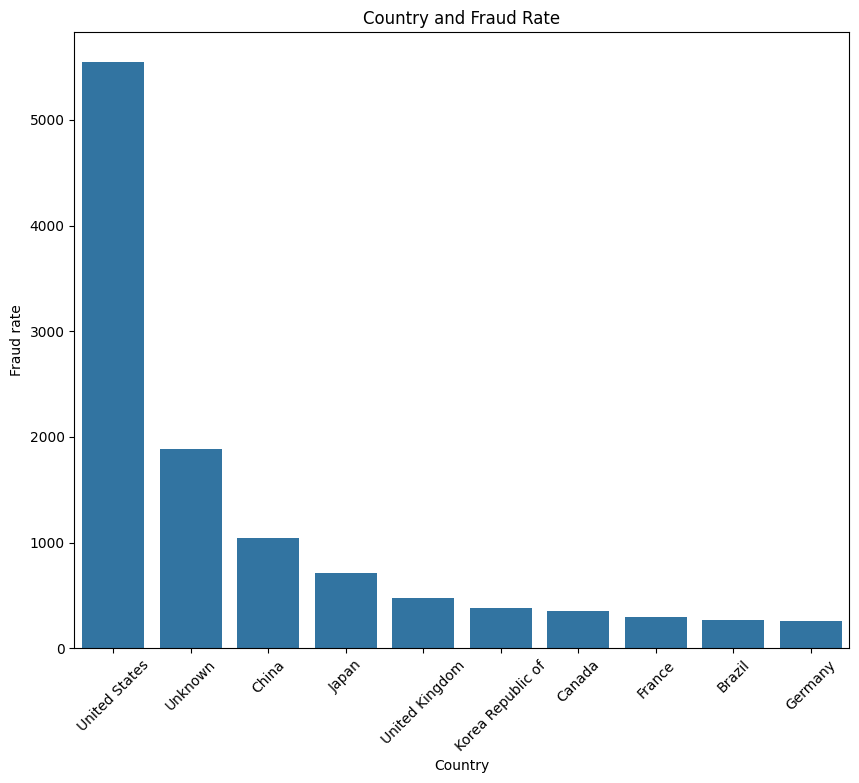

In [13]:
df_fruad_country=fraud_data[fraud_data['class']==1]
country_fraud=(df_fruad_country.groupby('ip_country').size().reset_index(name='fraud_country').sort_values(by='fraud_country',ascending=False).head(10))
plt.figure(figsize=(10,8))
sns.barplot(data=country_fraud,x='ip_country',y='fraud_country')
plt.title('Country and Fraud Rate')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Fraud rate')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_17664\3356061978.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_timesince_signup_fraud = df_fraud.groupby('signup_purchase_bin').size().reset_index(name='fraud_count')


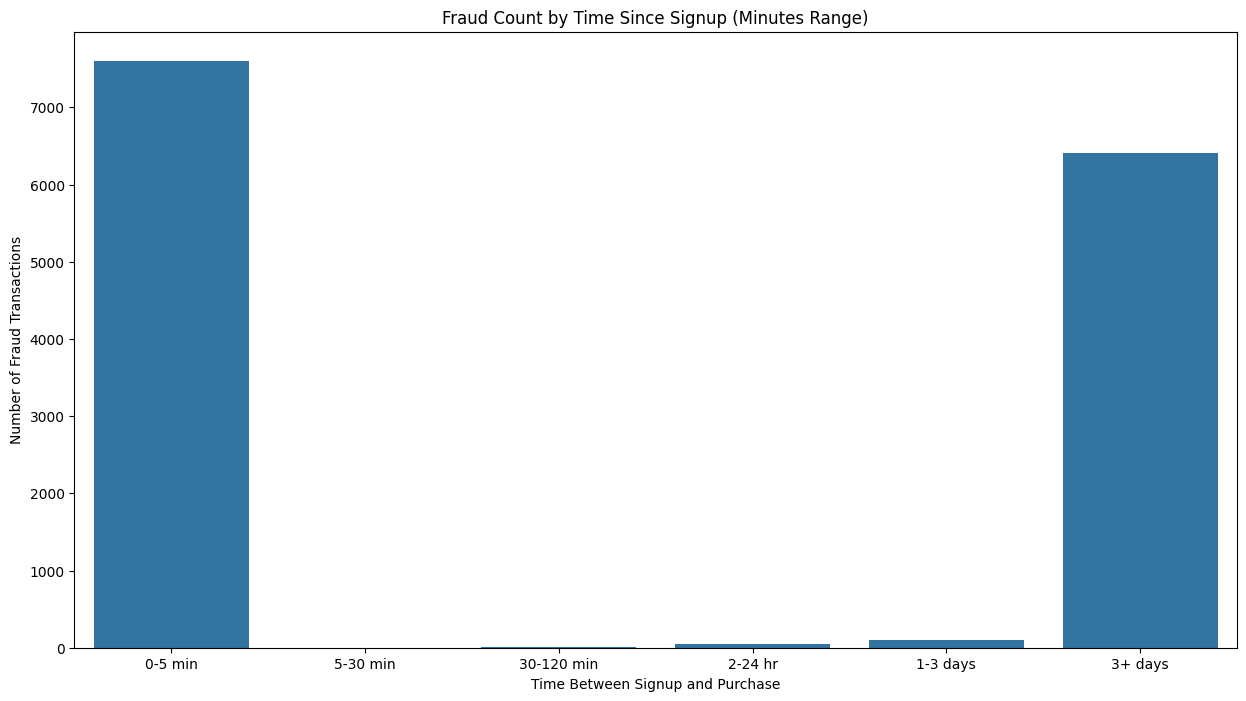

In [14]:
bins = [-1, 5, 30, 120, 1440, 4320, float('inf')]  
labels = ['0-5 min', '5-30 min', '30-120 min', '2-24 hr', '1-3 days', '3+ days']

df_duplicate['signup_purchase_bin'] = pd.cut(df_duplicate['time_since_signup'], bins=bins, labels=labels)
df_fraud = df_duplicate[df_duplicate['class'] == 1]

# Count fraud transactions per bin
df_timesince_signup_fraud = df_fraud.groupby('signup_purchase_bin').size().reset_index(name='fraud_count')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.barplot(data=df_timesince_signup_fraud, x='signup_purchase_bin', y='fraud_count')
plt.title('Fraud Count by Time Since Signup (Minutes Range)')
plt.xlabel('Time Between Signup and Purchase')
plt.ylabel('Number of Fraud Transactions')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_17664\3784293671.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_total = df_duplicate.groupby('signup_purchase_bin').size().reset_index(name='total_count')


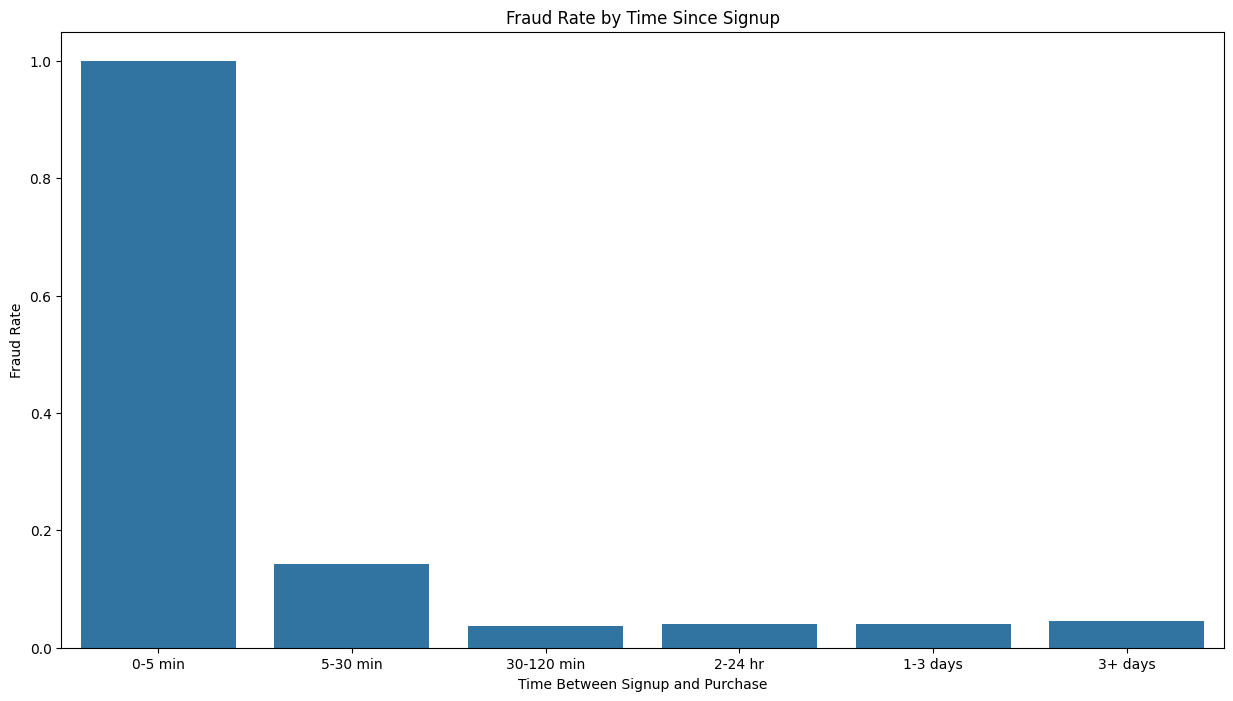

In [15]:
# Total transactions per bin
df_total = df_duplicate.groupby('signup_purchase_bin').size().reset_index(name='total_count')

# Merge with fraud counts
df_summary = pd.merge(df_timesince_signup_fraud, df_total, on='signup_purchase_bin', how='left')

# Compute fraud rate
df_summary['fraud_rate'] = df_summary['fraud_count'] / df_summary['total_count']

# Plot fraud rate
plt.figure(figsize=(15, 8))
sns.barplot(data=df_summary, x='signup_purchase_bin', y='fraud_rate')
plt.title('Fraud Rate by Time Since Signup')
plt.xlabel('Time Between Signup and Purchase')
plt.ylabel('Fraud Rate')
plt.show()


In [16]:
fraud_data['hour']=fraud_data['hour'].astype(int)

X=fraud_data.select_dtypes(include=['int64','float64']).drop('class',axis=1)
Y=fraud_data['class']


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
X=X.drop('user_id',axis=1)
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(X)
one=OneHotEncoder()
encoding_data=fraud_data.select_dtypes('object').drop(['device_id','dates'],axis=1)
encoded=one.fit_transform(encoding_data)



In [18]:
scaled_df=pd.DataFrame(scaled_data,columns=X.columns)
encoded_df = pd.DataFrame(encoded.toarray(), columns=one.get_feature_names_out(encoding_data.columns))
data=pd.concat([scaled_df,encoded_df],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (confusion_matrix,f1_score,precision_recall_curve,auc,ConfusionMatrixDisplay)
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=42)
logistic = LogisticRegression(solver='liblinear', max_iter=1000)

rf=RandomForestClassifier()
from scipy.stats import loguniform
#hyperparameter optimization
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
param_rf={
    'n_estimators':[10,50,100,200],
    'max_depth':[None,5,10,15],
 
 'class_weight': ['balanced'],
    'bootstrap':[True,False]
}
space = {
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}

random_forest_search=RandomizedSearchCV(
    rf,
    param_rf,
    cv=5,
    n_iter=10,
    random_state=42
    )
logistic_search = RandomizedSearchCV(
    logistic,
    space,
    cv=cv,
    n_iter=4,  # You only have 2 combos, 4 is safe
    scoring='accuracy',
    random_state=42
)
model={
    'Logistic Regression':logistic_search,
    'random_forest':random_forest_search
    
}


: 

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


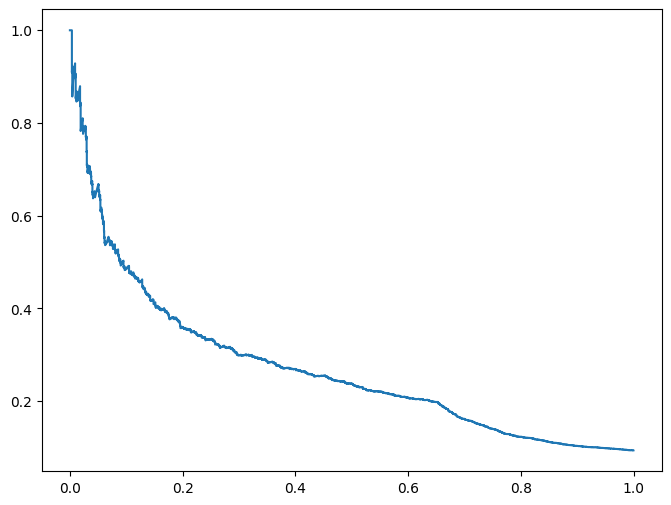

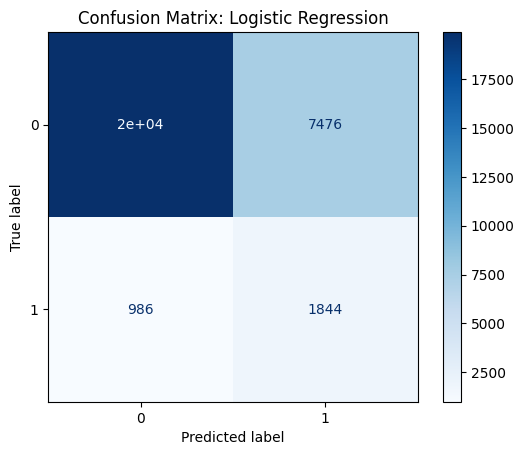

In [ ]:

results = []

plt.figure(figsize=(8, 6))  # One plot for all models

for name, model in model.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)[:, 1]

    # Metrics
    f1 = f1_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)  # NOTE: AUC uses recall on x-axis

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    results.append((name, f1, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Show final comparison
df_results = pd.DataFrame(results, columns=["Model", "F1 Score", "PR-AUC"])
print(df_results.sort_values(by="PR-AUC", ascending=False))
